# Риск и распределение инвестиций в стартапы: анализ

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 6)
%matplotlib inline

In [2]:
df = pd.read_csv('../data/raw/startup_investment_dataset.csv')
df.head()

,startup_stage,industry,region,requested_amount,pre_money_valuation,team_size,founders_experience_years,annual_revenue,market_size_estimate,investment_amount
0,Pre-Seed,ClimateTech,US,1.381327e+06,7.223187e+06,9,3,0.000000,6.039942e+06,0.000000e+00
1,Series B,HealthTech,US,7.784759e+06,3.049307e+07,13,8,96087.461835,6.886030e+07,7.203092e+06
2,Pre-Seed,HealthTech,LATAM,1.306439e+06,1.022702e+07,5,3,0.000000,1.896208e+07,0.000000e+00
3,Idea,E-commerce,US,8.840830e+05,4.531614e+06,3,2,0.000000,7.717272e+06,0.000000e+00
4,Series B,E-commerce,US,1.608484e+07,5.189190e+07,10,7,133652.729965,1.415670e+07,1.672645e+07


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   startup_stage              3000 non-null   object 
 1   industry                   3000 non-null   object 
 2   region                     3000 non-null   object 
 3   requested_amount           3000 non-null   float64
 4   pre_money_valuation        3000 non-null   float64
 5   team_size                  3000 non-null   int64  
 6   founders_experience_years  3000 non-null   int64  
 7   annual_revenue             3000 non-null   float64
 8   market_size_estimate       3000 non-null   float64
 9   investment_amount          3000 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 234.5+ KB


# Обзор признаков
## Общая информация о заявке
Признак | Тип | Описание
|---|---|---
`startup_stage` |	categorical|	Стадия стартапа (Idea / Pre-Seed / Seed / Series A / Series B)
`industry`|	categorical|	Отрасль стартапа
`region`|	categorical|	Основной рынок

## Стартап и продукт
| Поле                   | Тип   | Описание                      |
| ---------------------- | ----- | ----------------------------- |
| `pre_money_valuation`  | float | Оценка стартапа до инвестиций |
| `market_size_estimate` | float | Оценка объёма рынка (TAM)     |

## Финансовые метрики
| Поле               | Тип   | Описание                              |
| ------------------ | ----- | ------------------------------------- |
| `requested_amount` | float | Запрошенная сумма инвестиций          |
| `annual_revenue`   | float | Годовая выручка (0 для ранних стадий) |

## Команда
| Поле                        | Тип | Описание                       |
| --------------------------- | --- | ------------------------------ |
| `team_size`                 | int | Размер команды                 |
| `founders_experience_years` | int | Опыт фаундеров (суммарно, лет) |

## Целевая переменная 
| Поле                    | Тип   | Описание                                     |
| ----------------------- | ----- | -------------------------------------------- |
| **`investment_amount`** | float | **Фактическая сумма инвестиций (0 = отказ)** |

In [4]:
df['is_rejected'] = df['investment_amount'].apply(lambda x: 1 if x == 0 else 0)

df['is_rejected'].value_counts()

is_rejected
0    1948
1    1052
Name: count, dtype: int64

# Подготовка и постановка целей EDA
## Цели EDA

**1. Понять**:

- кто получает инвестиции, а кто нет;

- Что влияет на размер инвестиций.

**2. Сформировать**:

- статистические гипотезы и выводы.

In [5]:
rejection_rate = df['is_rejected'].mean()
print(f"Доля отказов: {rejection_rate:.2%}")

Доля отказов: 35.07%



=== startup_stage ===


,count
startup_stage,
Seed,899
Pre-Seed,736
Series A,630
Idea,435
Series B,300


Доля отказов по startup_stage:


,is_rejected
startup_stage,
Idea,0.655172
Pre-Seed,0.493207
Seed,0.294772
Series A,0.155556
Series B,0.136667


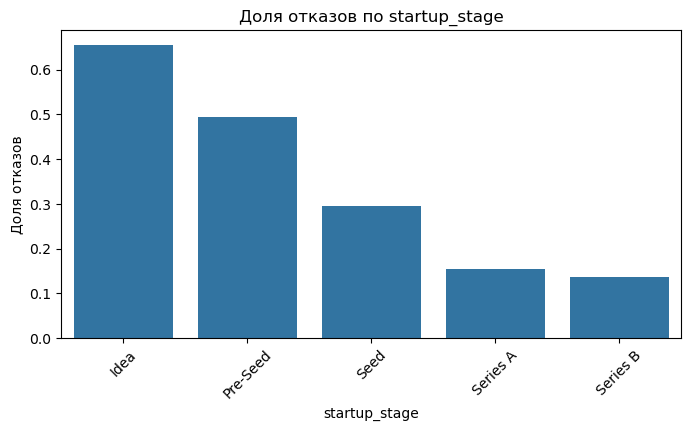


=== industry ===


,count
industry,
HealthTech,516
EdTech,511
FinTech,503
E-commerce,502
AI/SaaS,485
ClimateTech,483


Доля отказов по industry:


,is_rejected
industry,
FinTech,0.381710
EdTech,0.371820
AI/SaaS,0.352577
ClimateTech,0.341615
HealthTech,0.339147
E-commerce,0.316733


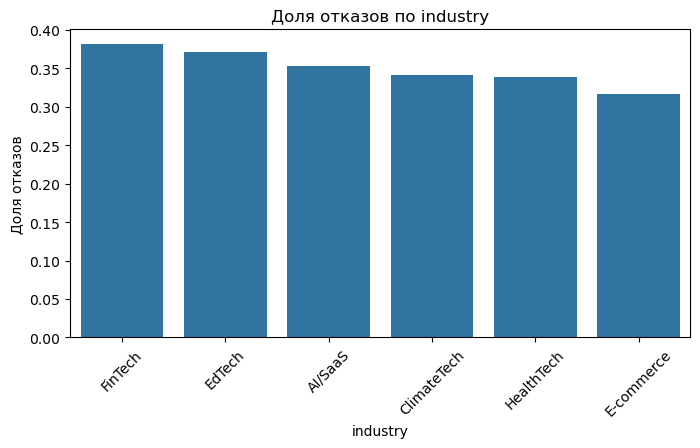


=== region ===


,count
region,
US,1343
Europe,950
Asia,422
LATAM,285


Доля отказов по region:


,is_rejected
region,
Europe,0.356842
LATAM,0.354386
US,0.349963
Asia,0.336493


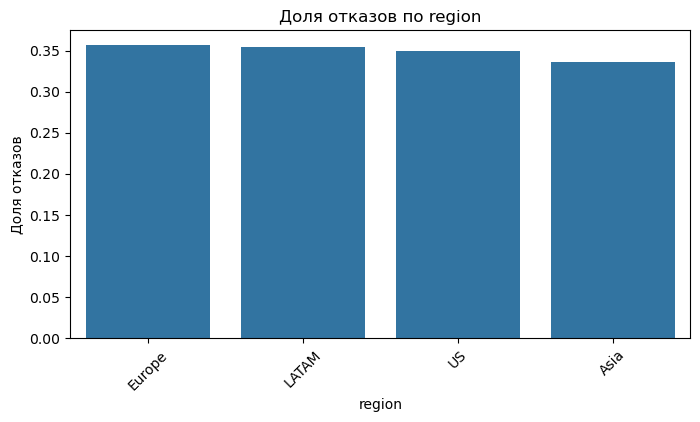

In [6]:
categorical_cols = ['startup_stage', 'industry', 'region']

for col in categorical_cols:
    print(f"\n=== {col} ===")
    display(pd.DataFrame(df[col].value_counts()))
    # Доля отказов
    stage_rej = df.groupby(col)['is_rejected'].mean().sort_values(ascending=False)
    print(f"Доля отказов по {col}:")
    display(pd.DataFrame(stage_rej))
    # Визуализация
    plt.figure(figsize=(8,4))
    sns.barplot(x=stage_rej.index, y=stage_rej.values)
    plt.xticks(rotation=45)
    plt.ylabel("Доля отказов")
    plt.title(f"Доля отказов по {col}")
    plt.show()

## Отказы

### 1. Стадия стартапа

![img](https://spark.ru/upload/other/b_55d7d2987fda1.jpg)

- Значимое большинство отказов в финансировании приходится на **стартапы, находящиеся на стадии презентации идеи**. Далее - предпосевная фаза, посевная, и меньшее кол-во - для стартапов, дошедших до сезонов инвестиций. 
> Скорее всего, связано с большим количеством неоригинальных и поспешных идей. Стартапы с уверенной базой рискуют меньше, так как они уже прошли предпосевную/посевную стадии.

### 2. Индустрия 

- Визуально нет сильной разницы по отказам между индустриями, однако **лидирующая по отказам сфера - финтех**. За ней следуют EdTech, AI/SaaS. **Наменьшая доля отказов наблюдается для E-Commerce**.
> EdTech - очень модная сфера с высокой конкуренцией и довольно узкими рамками на создание инновационных финансовых решений. То же самое относится к EdTech. А в области AI/SaaS предполагается очень высокая конкуренция. При том, E-Commerce - это не столько технологический сектор, но распространённый и довольно надёжный (интернет-магазины, онлайн-сервисы и т.п.).

### 3. Регион

- Почти не наблюдается "дискриминации" по региону, однако **лидер по отказам - Европа**, и **меньше всего отказов приходится на Азию**. 


=== requested_amount ===
count    3.000000e+03
mean     3.195140e+06
std      4.338243e+06
min      7.646508e+04
25%      8.986608e+05
50%      1.849690e+06
75%      3.802116e+06
max      7.488410e+07
Name: requested_amount, dtype: float64


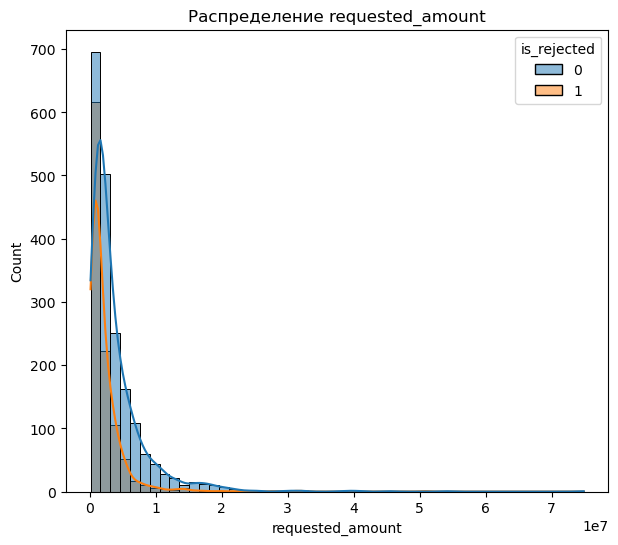

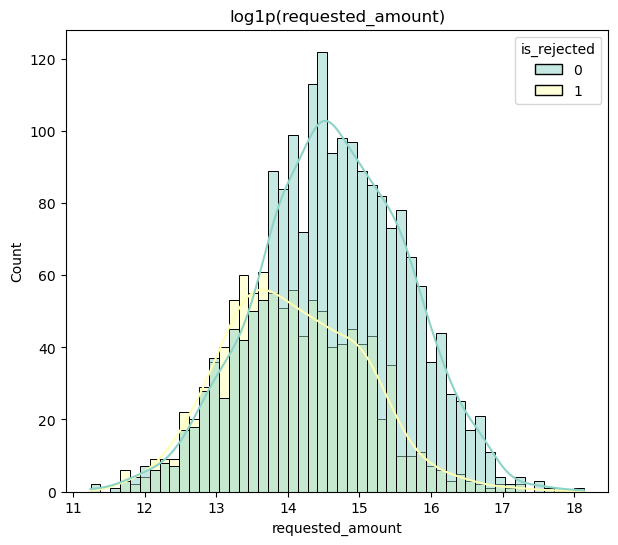

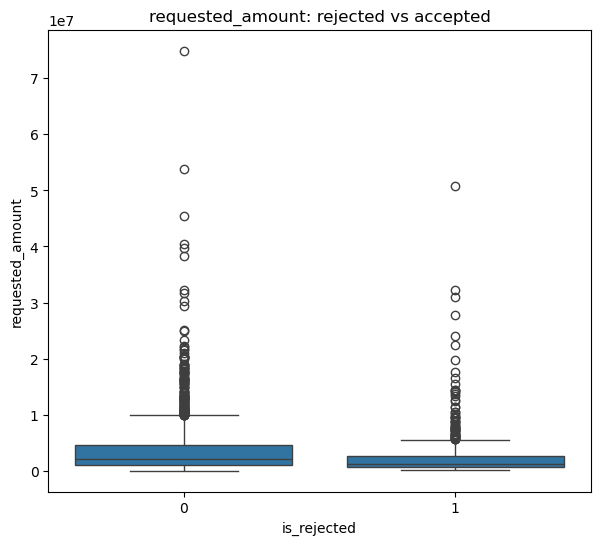


=== pre_money_valuation ===
count    3.000000e+03
mean     1.744689e+07
std      2.505192e+07
min      3.814903e+05
25%      4.616548e+06
50%      9.790187e+06
75%      2.049970e+07
max      5.774097e+08
Name: pre_money_valuation, dtype: float64


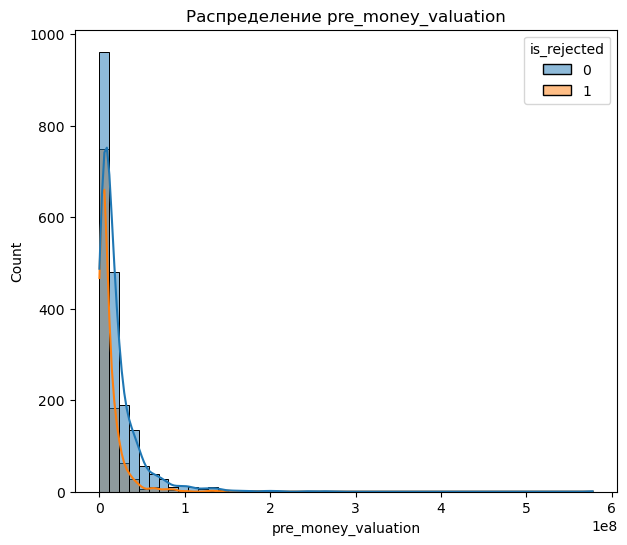

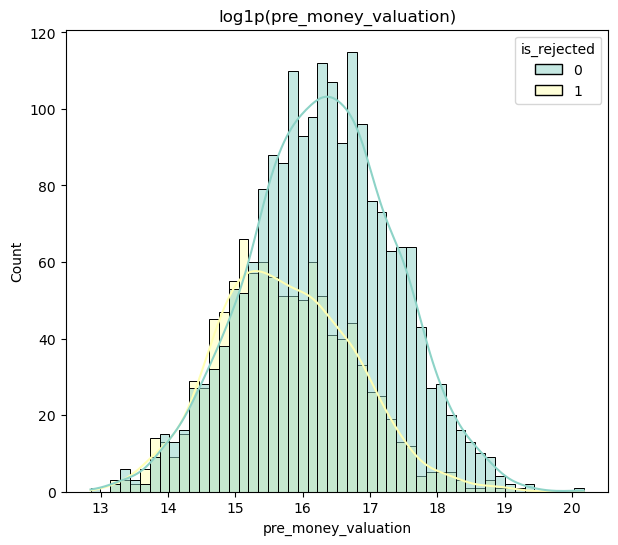

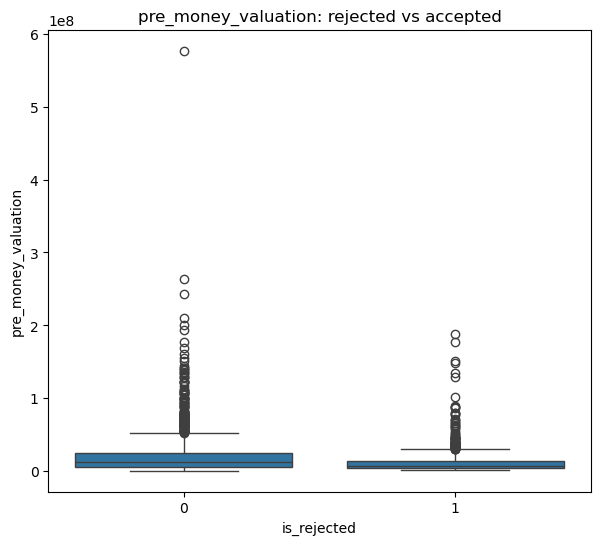


=== annual_revenue ===
count    3.000000e+03
mean     4.516207e+05
std      9.673710e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.591008e+05
75%      5.078232e+05
max      2.147011e+07
Name: annual_revenue, dtype: float64


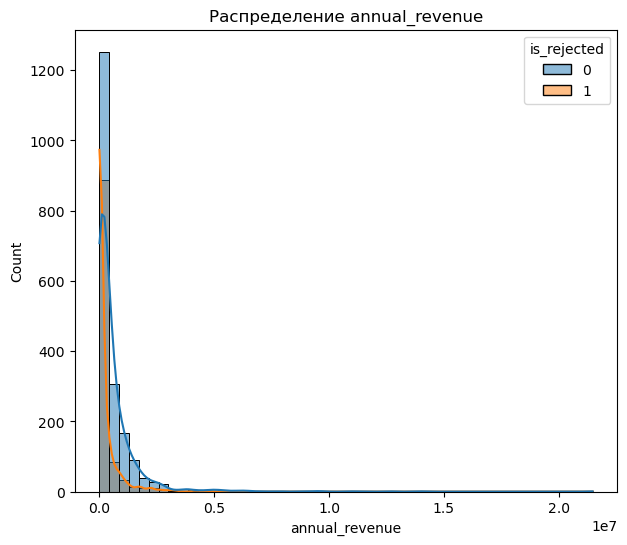

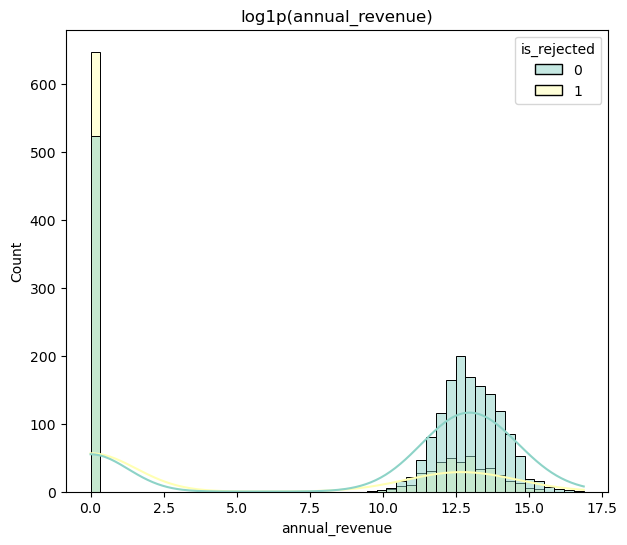

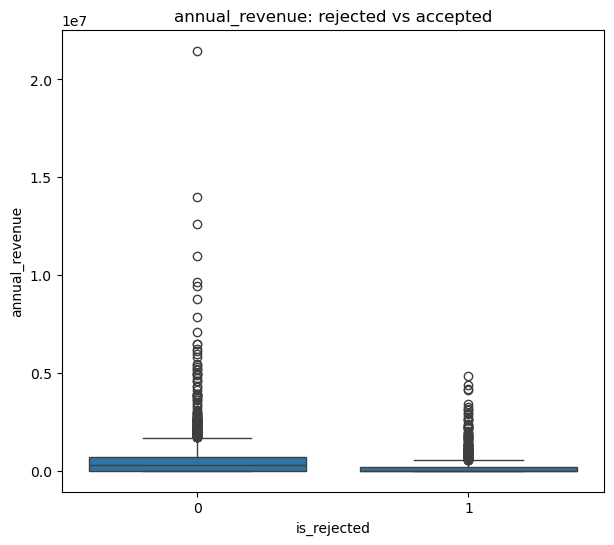


=== market_size_estimate ===
count    3.000000e+03
mean     1.214657e+07
std      1.147947e+07
min      6.598272e+05
25%      5.194470e+06
50%      8.902788e+06
75%      1.496898e+07
max      1.435592e+08
Name: market_size_estimate, dtype: float64


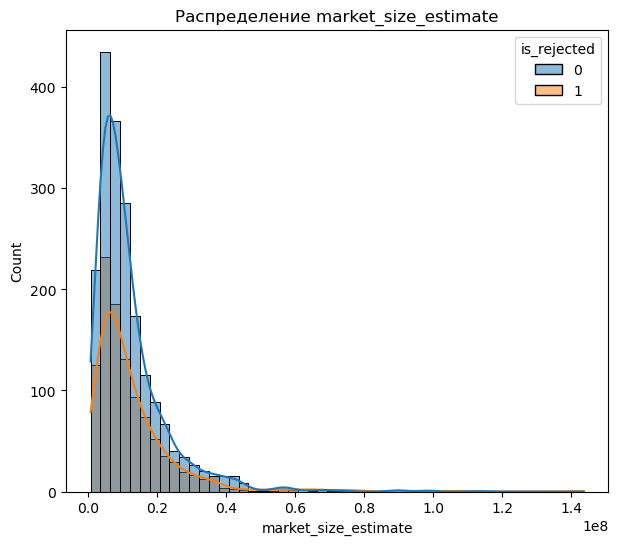

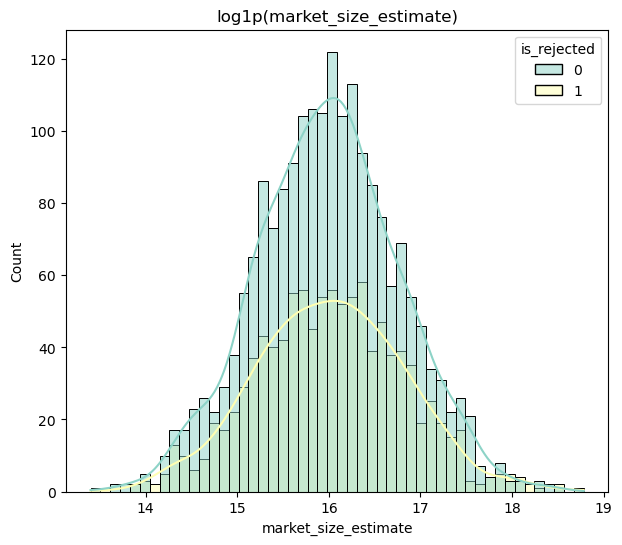

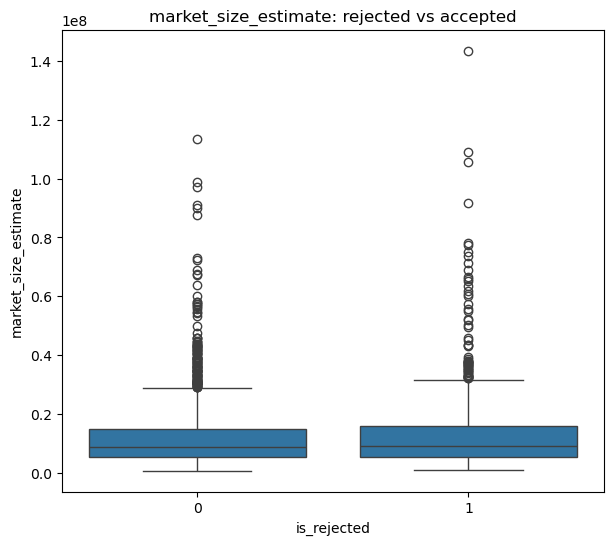


=== team_size ===
count    3000.000000
mean        8.224333
std         3.105783
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        18.000000
Name: team_size, dtype: float64


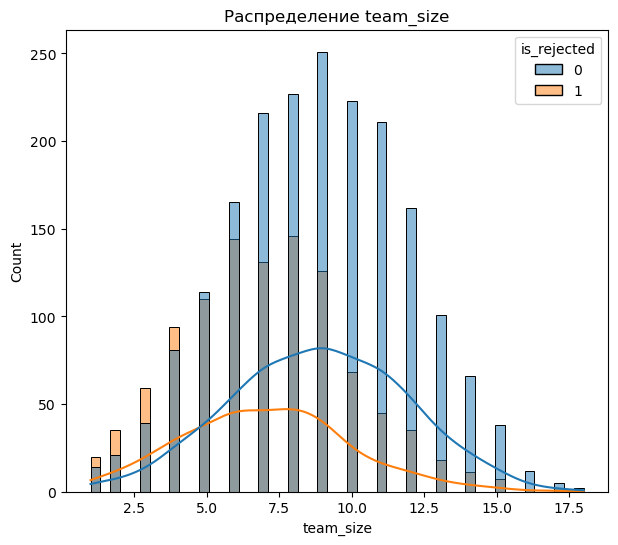

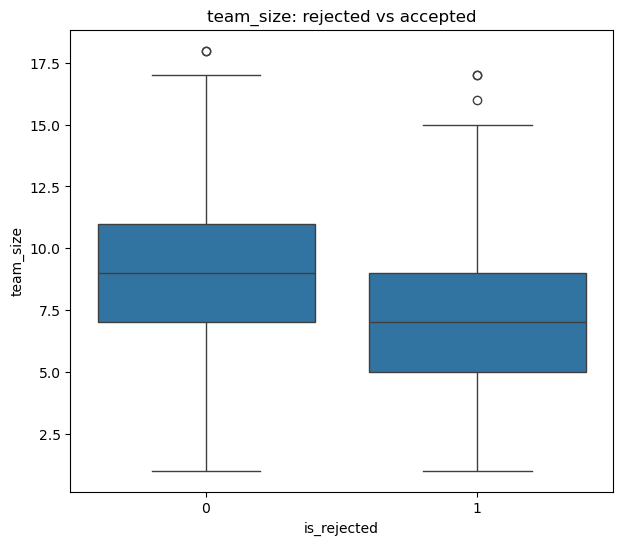


=== founders_experience_years ===
count    3000.000000
mean        5.942667
std         2.744307
min         0.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        18.000000
Name: founders_experience_years, dtype: float64


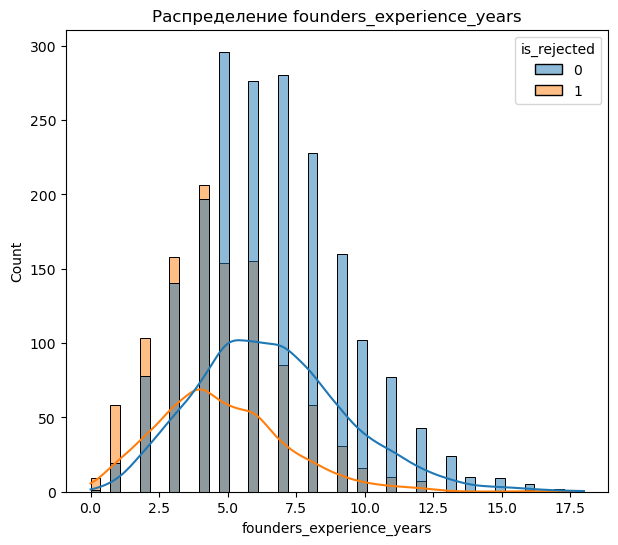

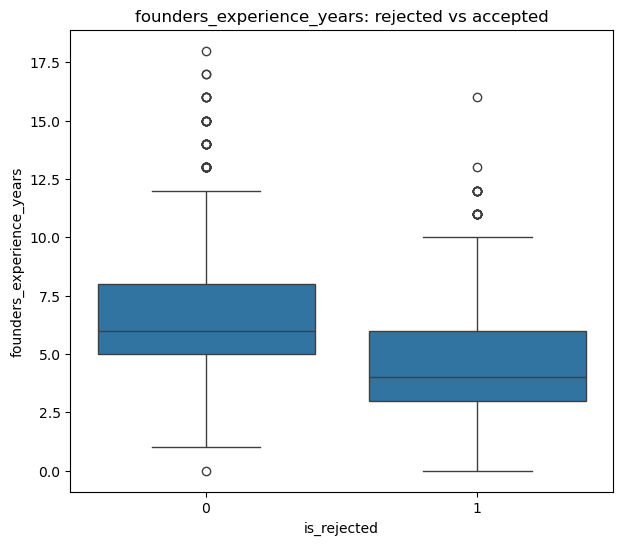


=== investment_amount ===
count    3.000000e+03
mean     2.080846e+06
std      3.847963e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.362892e+05
75%      2.561430e+06
max      8.125948e+07
Name: investment_amount, dtype: float64


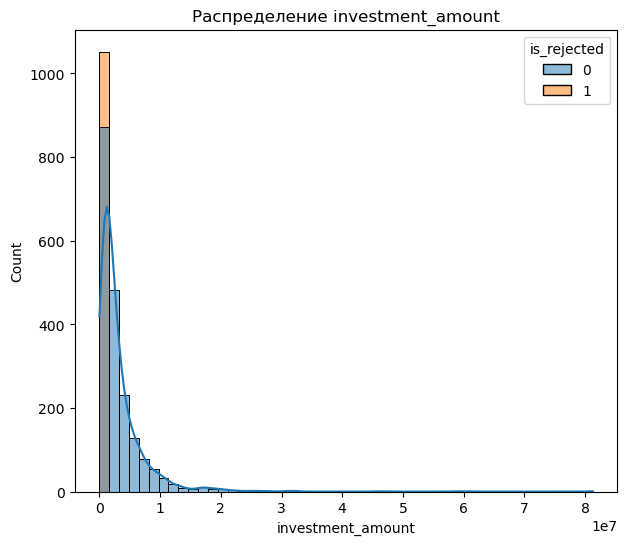

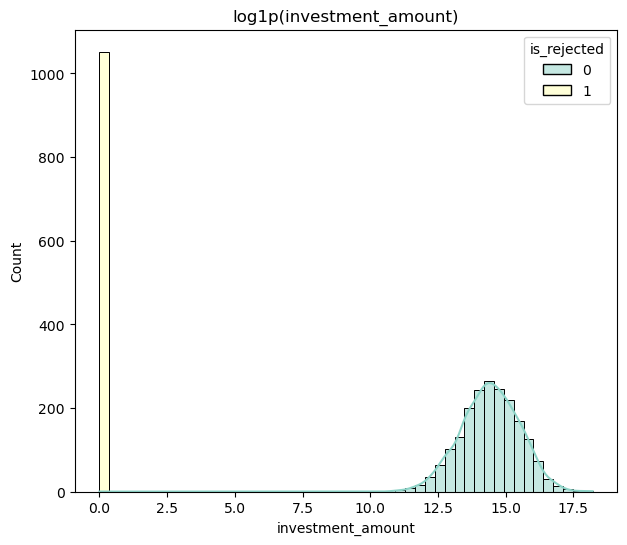

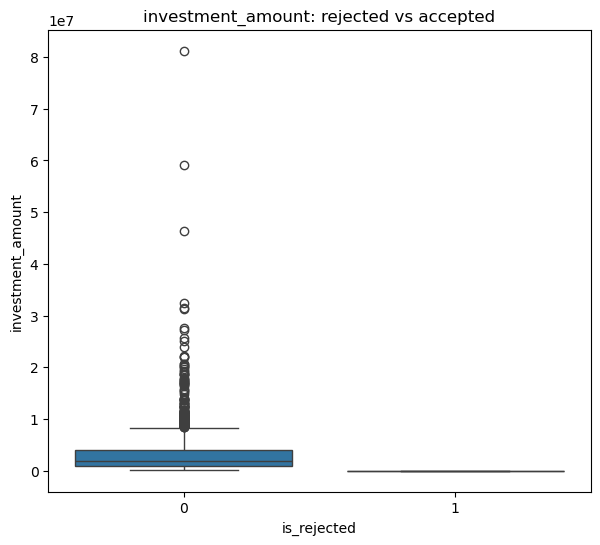

In [7]:
numerical_cols = ['requested_amount','pre_money_valuation','annual_revenue',
                  'market_size_estimate','team_size','founders_experience_years', 'investment_amount']

for col in numerical_cols:
    print(f"\n=== {col} ===")
    print(df[col].describe())
    
    # Гистограмма
    sns.histplot(data=df, x=col, hue='is_rejected', bins=50, kde=True)
    plt.title(f"Распределение {col}")
    plt.show()
    
    # Лог-преобразование для денежных величин
    if 'amount' in col or 'revenue' in col or 'valuation' in col or 'market_size' in col:
        sns.histplot(
            data=df,
            x=np.log1p(df[col]),
            hue='is_rejected',
            bins=50,
            kde=True,
            palette='Set3'
        )
        plt.title(f"log1p({col})")
        plt.show()

    
    # Boxplot: rejected vs accepted
    sns.boxplot(x='is_rejected', y=col, data=df)
    plt.title(f"{col}: rejected vs accepted")
    plt.show()

=== Корреляции (Пирсон) ===


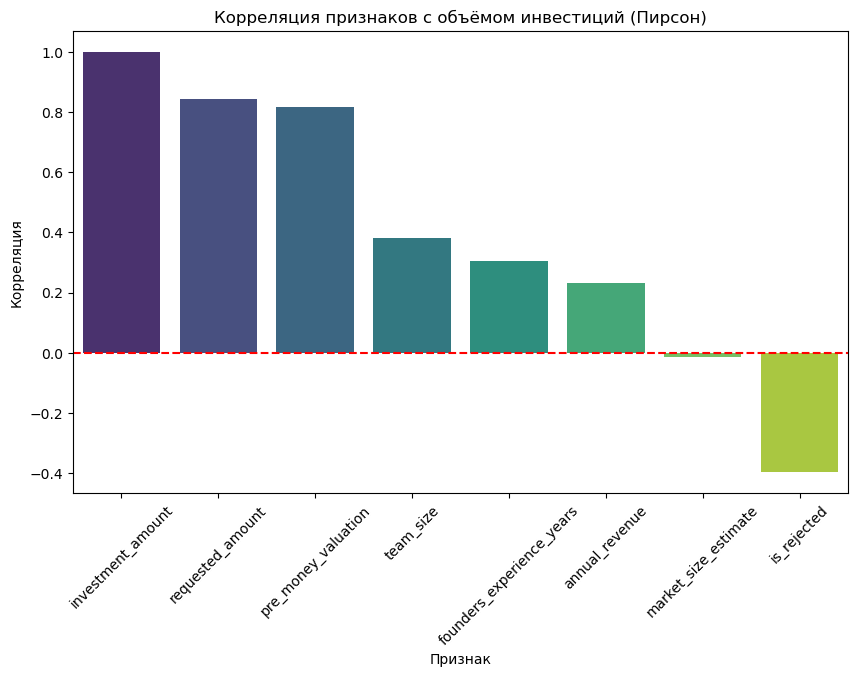

In [ ]:
print("=== Корреляции (Пирсон) ===")
corr = df.corr(numeric_only=True)[['investment_amount']]
corr_target = corr['investment_amount'].sort_values(ascending=False)
corr_target_df = pd.DataFrame({'feature': corr_target.index, 'corr': corr_target.values})

plt.figure(figsize=(10,6))
sns.barplot(x='feature', y='corr', data=corr_target_df, palette='viridis')
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=45)
plt.title("Корреляция признаков с объёмом инвестиций (Пирсон)")
plt.ylabel("Корреляция")
plt.xlabel("Признак")
plt.show()

=== Корреляции (Пирсон) ===


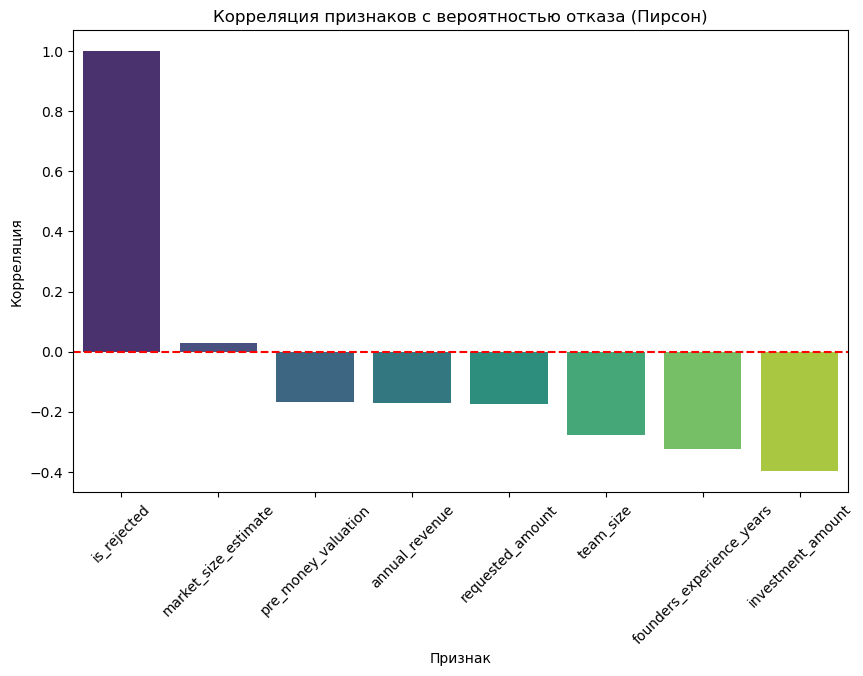

In [22]:
print("=== Корреляции (Пирсон) ===")
corr = df[numerical_cols + ['is_rejected']].corr()
corr_target = corr['is_rejected'].sort_values(ascending=False)
corr_target_df = pd.DataFrame({'feature': corr_target.index, 'corr': corr_target.values})

plt.figure(figsize=(10,6))
sns.barplot(x='feature', y='corr', data=corr_target_df, palette='viridis')
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=45)
plt.title("Корреляция признаков с вероятностью отказа (Пирсон)")
plt.ylabel("Корреляция")
plt.xlabel("Признак")
plt.show()

## Корреляция признаков

### Согласно корреляционному анализу, на **объём инвестиций**:
- Больше всего влияют _запрошенные_ суммы на вложения (_положительная корреляция_ - чем больше было запрошено, тем больше было вложено);
- Оценка инвесторами стоимости стартапа ещё до инвестиций (_положительная корреляция_ - с ростом оценки растут инвестиции);
- _Умеренно, но положительно_ влияют _размер команды_, _имеющийся опыт ведения бизнеса основателей_, _годовая выручка_.
- Практически не влияет оценка объёма рынка (TAM) (_отрицательная и незначительная корреляция_).

### На **вероятность отказа**:
- Сильнее всего влияет _опыт ведения бизнеса/стартапов у основателей_ (__отрицательная связь__ - чем меньше опыт, тем выше вероятность отказа);
- Размер команды (_отрицательная связь_ - чем меньше команда, тем выше вероятность отказа);
- _Запрашиваемый объём инвестиций_ (_отрицательная связь_ - объём запрашиваемых инвестиций может быть несправедливо высоким, что "отпугивает" инвесторов). 

# SUMMARY

---

## 1️⃣ Отказы по категориям

### Стадия стартапа:

- Наибольший риск отказа у стартапов на стадии идеи.

- Далее идут Pre-Seed и Seed стадии, наименее рискованные — более зрелые этапы Series A/B.

- Вероятно, связано с большим количеством неподготовленных и «сырых» идей на ранних стадиях.

### Индустрия:

- Лидеры по отказам: FinTech, EdTech, AI/SaaS — высококонкурентные сферы с высокими требованиями к инновациям.

- Меньше всего отказов: E-Commerce — более устоявшийся, менее технологически рискованный сектор.

### Регион:

- Различия незначительные, но Европа лидирует по отказам, а Азия демонстрирует наименьший уровень отказов.

---

## 2️⃣ Корреляция признаков с инвестициями

### Сильные положительные корреляции:

- `requested_amount` — чем больше запрашивают, тем выше объём инвестиций.

- `pre_money_valuation` — рост оценки стартапа повышает инвестиции.

### Умеренные положительные корреляции:

- `team_size`, `founders_experience_years`, `annual_revenue`.

Эти признаки повышают доверие инвесторов, но не определяют объём инвестиций напрямую.

### Слабые или отрицательные:

- `market_size_estimate` — практически не влияет.

---

## 3️⃣ Корреляция признаков с вероятностью отказа

- Ключевые отрицательные корреляции (увеличение -> меньше отказов):

- Опыт основателей (`founders_experience_years`) -> критично.

- Размер команды (`team_size`) - маленькие команды чаще получают отказ.

- Запрашиваемый объём инвестиций (`requested_amount`) — слишком большие запросы повышают риск отказа.

---

## 4️⃣ Выводы

- Объём инвестиций зависит в первую очередь от оценки ценности и запроса, второстепенно — от команды и текущих финансовых показателей.

- Вероятность отказа определяется оценкой риска команды: опыт, размер и реалистичность запросов.

- Рыночные оценки (TAM) имеют минимальное влияние на решения инвесторов.

- На ранних стадиях стартапы и в высококонкурентных индустриях риск отказа выше.

---
---

# Статистические гипотезы и выводы

In [24]:
from scipy.stats import spearmanr, mannwhitneyu

In [25]:
features = ['requested_amount', 'pre_money_valuation', 'team_size', 
            'founders_experience_years', 'annual_revenue', 'market_size_estimate']

# 1. Корреляция признаков с объёмом инвестиций
for f in features:
    corr, p = spearmanr(df[f], df['investment_amount'])
    print(f"Корреляция Спирмена {f} ↔ investment_amount: {corr:.2f}, p={p:.3f}")

print('-' * 45)

# 2. Проверка различий признаков между отклонёнными и принятыми стартапами
for f in features:
    group0 = df.loc[df['is_rejected']==0, f]  # принятые стартапы
    group1 = df.loc[df['is_rejected']==1, f]  # отклонённые стартапы
    stat, p = mannwhitneyu(group0, group1, alternative='two-sided')
    print(f"Тест Манна-Уитни для {f} по статусу отказа: stat={stat:.2f}, p={p:.3f}")

Корреляция Спирмена requested_amount ↔ investment_amount: 0.63, p=0.000
Корреляция Спирмена pre_money_valuation ↔ investment_amount: 0.60, p=0.000
Корреляция Спирмена team_size ↔ investment_amount: 0.46, p=0.000
Корреляция Спирмена founders_experience_years ↔ investment_amount: 0.40, p=0.000
Корреляция Спирмена annual_revenue ↔ investment_amount: 0.50, p=0.000
Корреляция Спирмена market_size_estimate ↔ investment_amount: -0.02, p=0.411
---------------------------------------------
Тест Манна-Уитни для requested_amount по статусу отказа: stat=1343377.00, p=0.000
Тест Манна-Уитни для pre_money_valuation по статусу отказа: stat=1330941.00, p=0.000
Тест Манна-Уитни для team_size по статусу отказа: stat=1372691.50, p=0.000
Тест Манна-Уитни для founders_experience_years по статусу отказа: stat=1431316.50, p=0.000
Тест Манна-Уитни для annual_revenue по статусу отказа: stat=1423553.00, p=0.000
Тест Манна-Уитни для market_size_estimate по статусу отказа: stat=1005669.00, p=0.402


- Корреляция Спирмена показывает, как каждый признак связан с объёмом инвестиций - положительная или отрицательная связь и значимость p-value.

- Тест Манна-Уитни проверяет, есть ли статистически значимые различия признаков между отклонёнными и принятыми стартапами.

## Интерпретация статистических выводов 
- Объём инвестиций в стартапы определяется в первую очередь запросом и оценкой стоимости, второстепенно - командой и финансовыми показателями. Рыночные оценки (**TAM**) практически не влияют.

- Вероятность отказа определяется оценкой риска команды и реалистичностью запроса. Опыт, размер команды и финансовые показатели снижают шанс отказа. **TAM** снова не влияет.

---

## Что привлекает инвестиции:

- Реалистичный запрос (`requested_amount`)

- Высокая оценка стартапа (`pre_money_valuation`)

- Команда и финансовые показатели (`team_size`, `founders_experience_years`, `annual_revenue`)

## Что снижает вероятность отказа:

- Опыт и размер команды

- Реалистичный и обоснованный запрос

- Высокая оценка и текущая выручка

## Что не влияет:

- Размер рынка (**TAM**) практически не играет роли ни для объёма инвестиций, ни для отказов.

In [26]:
df.head()

,startup_stage,industry,region,requested_amount,pre_money_valuation,team_size,founders_experience_years,annual_revenue,market_size_estimate,investment_amount,is_rejected
0,Pre-Seed,ClimateTech,US,1.381327e+06,7.223187e+06,9,3,0.000000,6.039942e+06,0.000000e+00,1
1,Series B,HealthTech,US,7.784759e+06,3.049307e+07,13,8,96087.461835,6.886030e+07,7.203092e+06,0
2,Pre-Seed,HealthTech,LATAM,1.306439e+06,1.022702e+07,5,3,0.000000,1.896208e+07,0.000000e+00,1
3,Idea,E-commerce,US,8.840830e+05,4.531614e+06,3,2,0.000000,7.717272e+06,0.000000e+00,1
4,Series B,E-commerce,US,1.608484e+07,5.189190e+07,10,7,133652.729965,1.415670e+07,1.672645e+07,0


In [27]:
try:
    df.to_csv('../data/processed/startup_investment_dataset+rejected_status.csv', index=False)
    print('Датасет с признаком is_rejected сохранён в data/processed.')
except FileNotFoundError as e:
    print('Файл не найден при чтении: \n{e}')
except PermissionError as e:
    print(f'Нет доступа к записи:\n{e}')
finally:
    print('-' * 45)

Датасет с признаком is_rejected сохранён в data/processed.
---------------------------------------------
